In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.fubini_study, qtm.encoding
import importlib
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_1qubit)
importlib.reload(qtm.qtm_nqubit)

<module 'qtm.qtm_nqubit' from '..\\qtm\\qtm_nqubit.py'>

In [2]:
# Init parameters
num_qubits = 4
# For arbitrary initial state
num_layers = 1


In [3]:
thetas_origin = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*num_layers*5)
# For determine GHZ state
theta = np.random.uniform(0, 2*np.pi)

In [4]:
# GHZ
thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values_ghz = []
thetass_ghz = []
for i in range(0, 100):
    # fubini_study for binho_state is same for koczor state
    G = qtm.fubini_study.calculate_koczor_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_GHZchecker_binho,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.qtm_nqubit.create_GHZchecker_binho(qc.copy(), thetas, num_layers, theta)
    
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_ghz.append(loss)
    thetass_ghz.append(thetas)



In [23]:
loss_values_ghz = loss_values_ghz[:100]
thetass_ghz = thetass_ghz[:100]

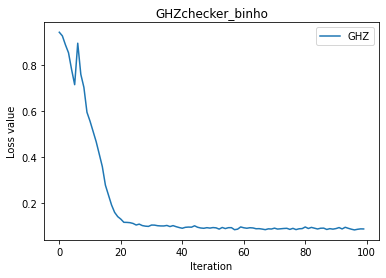

In [24]:
# Plot loss value in 100 steps
plt.plot(loss_values_ghz, label='GHZ', linestyle = '-')
plt.title('GHZchecker_binho')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('GHZchecker_binho.png', format='png', dpi=600)
plt.show()

In [6]:
np.min(loss_values_ghz)

0.0827

In [25]:
traces_ghz, fidelities_ghz = [], []
for thetas in thetass_ghz:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_binho_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.qtm_nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_ghz.append(trace)
    fidelities_ghz.append(fidelity)

In [26]:
# Plot loss value in 100 steps
np.savetxt("./loss_values_ghz_4qubits.csv", loss_values_ghz, delimiter=",")
np.savetxt("./thetass_ghz_4qubits.csv", thetass_ghz, delimiter=",")
np.savetxt("./traces_ghz_4qubits.csv", traces_ghz, delimiter=",")
np.savetxt("./fidelities_ghz_4qubits.csv", fidelities_ghz, delimiter=",")


In [9]:
# W

thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values_w = []
thetass_w = []
for i in range(0, 150):
    print(i)
    G = qtm.fubini_study.calculate_koczor_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_Wchecker_binho, 
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.qtm_nqubit.create_Wchecker_binho(qc.copy(), thetas, num_layers)
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_w.append(loss)
    thetass_w.append(thetas)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [27]:
loss_values_w = loss_values_w[:100]
thetass_w = thetass_w[:100]

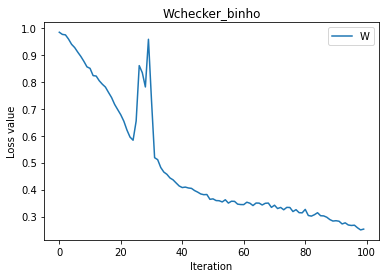

In [28]:

# Plot loss value in 100 steps
plt.plot(loss_values_w, label='W', linestyle = '-')
plt.title('Wchecker_binho')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('Wchecker_binho.png', format='png', dpi=600)
plt.show()

In [29]:
import qtm.custom_gate
traces_w, fidelities_w = [], []
for thetas in thetass_w:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_binho_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.qtm_nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_w.append(trace)
    fidelities_w.append(fidelity)

In [30]:
np.savetxt("./loss_values_w_4qubits.csv", loss_values_w, delimiter=",")
np.savetxt("./thetass_w_4qubits.csv", thetass_w, delimiter=",")
np.savetxt("./traces_w_4qubits.csv", traces_w, delimiter=",")
np.savetxt("./fidelities_w_4qubits.csv", fidelities_w, delimiter=",")

In [13]:
psi = 2*np.random.rand(2**num_qubits)-1

In [14]:
# Haar

thetas = thetas_origin.copy()

psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')

loss_values_haar = []
thetass_haar = []
for i in range(0, 100):
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    G = qtm.fubini_study.calculate_koczor_state(qc.copy(), thetas, num_layers)
    qc = encoder.qcircuit
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_haarchecker_binho, 
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, encoder = encoder)
    
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.qtm_nqubit.create_haarchecker_binho(qc.copy(), thetas, num_layers, encoder)
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_haar.append(loss)
    thetass_haar.append(thetas)



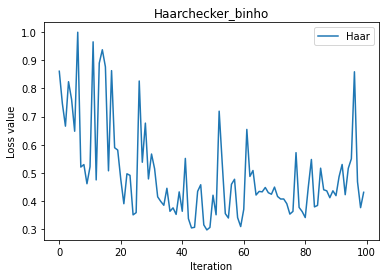

In [22]:
# Plot loss value in 100 steps
plt.plot(loss_values_haar, label='Haar', linestyle = '-')
plt.title('Haarchecker_binho')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('Haarchecker_binho.png', format='png', dpi=600)
plt.show()

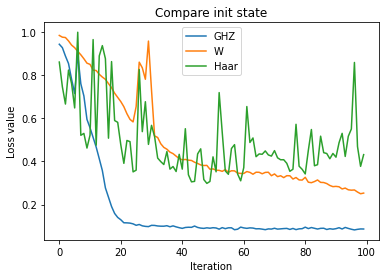

In [31]:

# Plot loss value in 100 steps
plt.plot(loss_values_ghz, label='GHZ')
plt.plot(loss_values_w, label='W')
plt.plot(loss_values_haar, label='Haar')
plt.title('Compare init state')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('Compare_init_state.png', format='png', dpi=600)
plt.show()

In [32]:
traces_haar, fidelities_haar = [], []
for thetas in thetass_haar:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_binho_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = encoder.qcircuit
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_haar.append(trace)
    fidelities_haar.append(fidelity)

In [33]:
np.savetxt("./loss_values_haar_4qubits.csv", loss_values_haar, delimiter=",")
np.savetxt("./thetass_haar_4qubits.csv", thetass_haar, delimiter=",")
np.savetxt("./traces_haar_4qubits.csv", traces_haar, delimiter=",")
np.savetxt("./fidelities_haar_4qubits.csv", fidelities_haar, delimiter=",")

C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


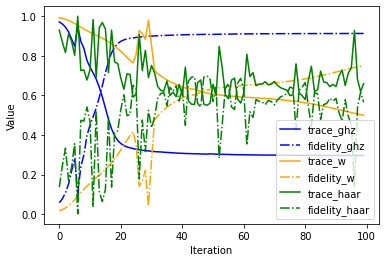

In [34]:
plt.plot(traces_ghz, label = 'trace_ghz', color = 'blue')
plt.plot(fidelities_ghz, label = 'fidelity_ghz', linestyle = '-.', color = 'blue')
plt.plot(traces_w, label = 'trace_w', color = 'orange')
plt.plot(fidelities_w, label = 'fidelity_w', linestyle = '-.', color = 'orange')
plt.plot(traces_haar, label = 'trace_haar', color = 'g')
plt.plot(fidelities_haar, label = 'fidelity_haar', linestyle = '-.', color = 'g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('Compare_init_state_trace_fidelity.png', format='png', dpi=600)
plt.show()


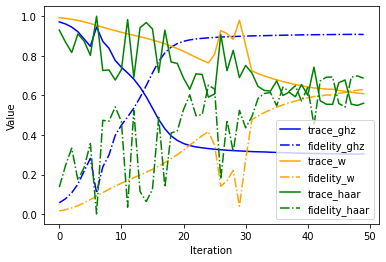

In [35]:
# import pandas as pd
# fidelities_ghz = pd.read_csv("../../experiments/compare_initstate/fidelities_ghz.csv", sep=",", header=None)
# fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

# fidelities_w = pd.read_csv("../../experiments/compare_initstate/fidelities_w.csv", sep=",", header=None)
# fidelities_w = fidelities_w.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

# fidelities_haar = pd.read_csv("../../experiments/compare_initstate/fidelities_haar.csv", sep=",", header=None)
# fidelities_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

# traces_ghz = pd.read_csv("../../experiments/compare_initstate/traces_ghz.csv", sep=",", header=None)

# traces_w = pd.read_csv("../../experiments/compare_initstate/traces_w.csv", sep=",", header=None)

# traces_haar = pd.read_csv("../../experiments/compare_initstate/traces_haar.csv", sep=",", header=None)


plt.plot(traces_ghz[:50], label = 'trace_ghz', color = 'blue')
plt.plot(fidelities_ghz[:50], label = 'fidelity_ghz', linestyle = '-.', color = 'blue')
plt.plot(traces_w[:50], label = 'trace_w', color = 'orange')
plt.plot(fidelities_w[:50], label = 'fidelity_w', linestyle = '-.', color = 'orange')
plt.plot(traces_haar[:50], label = 'trace_haar', color = 'g')
plt.plot(fidelities_haar[:50], label = 'fidelity_haar', linestyle = '-.', color = 'g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('Compare_init_state_trace_fidelity_50.png', format='png', dpi=600)
plt.show()
